In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from numpy.linalg import inv, solve
from sklearn.linear_model import LinearRegression

In [4]:
poks = pd.read_csv("pokemon.csv")

# 0. Взглянем на данные

In [5]:
poks.describe().T

count          mean            std        min        25%  \
against_bug        801.0  9.962547e-01       0.597248       0.25        0.5   
against_dark       801.0  1.057116e+00       0.438142       0.25        1.0   
against_dragon     801.0  9.687890e-01       0.353058       0.00        1.0   
against_electric   801.0  1.073970e+00       0.654962       0.00        0.5   
against_fairy      801.0  1.068976e+00       0.522167       0.25        1.0   
against_fight      801.0  1.065543e+00       0.717251       0.00        0.5   
against_fire       801.0  1.135456e+00       0.691853       0.25        0.5   
against_flying     801.0  1.192884e+00       0.604488       0.25        1.0   
against_ghost      801.0  9.850187e-01       0.558256       0.00        1.0   
against_grass      801.0  1.034020e+00       0.788896       0.25        0.5   
against_ground     801.0  1.098002e+00       0.738818       0.00        1.0   
against_ice        801.0  1.208177e+00       0.735356       0.25        0.5   
against_normal     801.0  8.870162e-01       0.266106       0.00        1.0   
against_poison     801.0  9.753433e-01       0.549375       0.00        0.5   
against_psychic    801.0  1.005306e+00       0.495183       0.00        1.0   
against_rock       801.0  1.250312e+00       0.697148       0.25        1.0   
against_steel      801.0  9.834582e-01       0.500117       0.25        0.5   
against_water      801.0  1.058365e+00       0.606562       0.25        0.5   
attack             801.0  7.785768e+01      32.158820       5.00       55.0   
base_egg_steps     801.0  7.191011e+03    6558.220422    1280.00     5120.0   
base_happiness     801.0  6.536205e+01      19.598948       0.00       70.0   
base_total         801.0  4.283770e+02     119.203577     180.00      320.0   
defense            801.0  7.300874e+01      30.769159       5.00       50.0   
experience_growth  801.0  1.054996e+06  160255.835096  600000.00  1000000.0   
height_m           781.0  1.163892e+00       1.080326       0.10        0.6   
hp                 801.0  6.895880e+01      26.576015       1.00       50.0   
percentage_male    703.0  5.515576e+01      20.261623       0.00       50.0   
pokedex_number     801.0  4.010000e+02     231.373075       1.00      201.0   
sp_attack          801.0  7.130587e+01      32.353826      10.00       45.0   
sp_defense         801.0  7.091136e+01      27.942501      20.00       50.0   
speed              801.0  6.633458e+01      28.907662       5.00       45.0   
weight_kg          781.0  6.137810e+01     109.354766       0.10        9.0   
generation         801.0  3.690387e+00       1.930420       1.00        2.0   
is_legendary       801.0  8.739076e-02       0.282583       0.00        0.0   

                         50%        75%        max  
against_bug              1.0        1.0        4.0  
against_dark             1.0        1.0        4.0  
against_dragon           1.0        1.0        2.0  
against_electric         1.0        1.0        4.0  
against_fairy            1.0        1.0        4.0  
against_fight            1.0        1.0        4.0  
against_fire             1.0        2.0        4.0  
against_flying           1.0        1.0        4.0  
against_ghost            1.0        1.0        4.0  
against_grass            1.0        1.0        4.0  
against_ground           1.0        1.0        4.0  
against_ice              1.0        2.0        4.0  
against_normal           1.0        1.0        1.0  
against_poison           1.0        1.0        4.0  
against_psychic          1.0        1.0        4.0  
against_rock             1.0        2.0        4.0  
against_steel            1.0        1.0        4.0  
against_water            1.0        1.0        4.0  
attack                  75.0      100.0      185.0  
base_egg_steps        5120.0     6400.0    30720.0  
base_happiness          70.0       70.0      140.0  
base_total             435.0      505.0      780.0  
defense                 70.0      

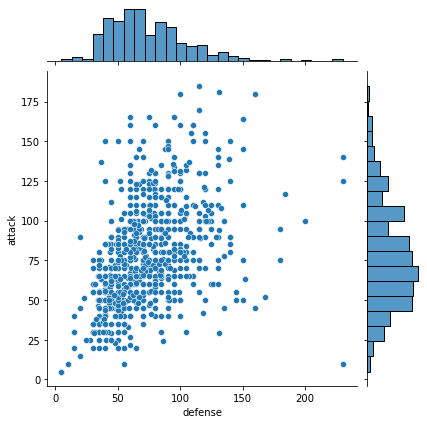

In [7]:
sns.jointplot(data=poks, x="defense", y="attack");

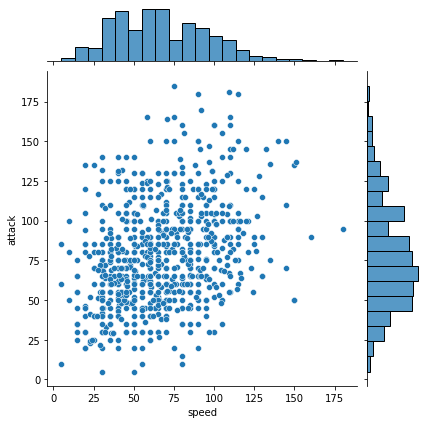

In [8]:
sns.jointplot(data=poks, x="speed", y="attack");

# 1. Проекция по формулам

In [11]:
y = poks["attack"]
X = poks[["defense", "speed"]]

In [12]:
X.shape

(801, 2)

In [13]:
ones = np.ones((801, 1))

In [14]:
X = np.hstack((ones, X))

In [15]:
X[:10, :]

array([[  1.,  49.,  45.],
       [  1.,  63.,  60.],
       [  1., 123.,  80.],
       [  1.,  43.,  65.],
       [  1.,  58.,  80.],
       [  1.,  78., 100.],
       [  1.,  65.,  43.],
       [  1.,  80.,  58.],
       [  1., 120.,  78.],
       [  1.,  35.,  45.]])

In [16]:
XtX = X.T @ X
Xty = X.T @ y

In [22]:
# 1 вариант, более стабильный
v = solve(XtX, Xty)
v

array([16.53312028,  0.48719894,  0.38825567])

In [23]:
# 2 вариант, менее стабильный
v = inv(XtX) @ Xty
v

array([16.53312028,  0.48719894,  0.38825567])

In [24]:
y_hat = X @ v
(y - y_hat) @ poks["defense"]

1.9936123862862587e-09

In [26]:
# Построим прогноз для нового объекта
new_pokemon = np.array((1, 42, 77))
new_pokemon @ v

66.89116213355395

# 2. Проекция с помощью боевого инструмента

In [27]:
reg = LinearRegression()
X = poks[["defense", "speed"]]
reg.fit(X, y)

LinearRegression()

In [28]:
reg.coef_

array([0.48719894, 0.38825567])

In [30]:
reg.intercept_

16.533120282305816

In [32]:
new_pokemon = pd.DataFrame({"defense": [42], 
                            "speed": [77]})
reg.predict(new_pokemon)

array([66.89116213])

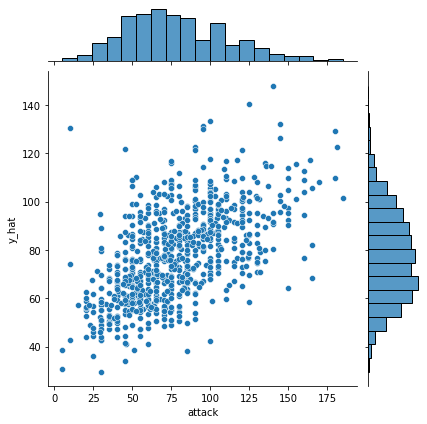

In [35]:
y_hat = reg.predict(X)
poks["y_hat"] = y_hat
sns.jointplot(data=poks, x="attack", y="y_hat");